
## Week 6 — Hands-on: Sports/Team Statistics (Comparisons)

All visuals use **Matplotlib only**
Demo values are illustrative (not official league stats).


In [143]:

# Setup
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt, math
rng = np.random.default_rng(2102)

import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'plotly_mimetype+notebook_connected'



## 1) NBA — Team snapshot (compare categories; rank)

In [124]:
import pandas as pd
import numpy as np

URL = "https://raw.githubusercontent.com/NocturneBear/NBA-Data-2010-2024/refs/heads/main/regular_season_totals_2010_2024.csv"

raw = pd.read_csv(URL)
raw.head()

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,AVAILABLE_FLAG
0,2022-23,1610612744,GSW,Golden State Warriors,22201230,2023-04-09T00:00:00,GSW @ POR,W,48.0,58,...,1,1578,55,512,457,678,2455,3,1,1.0
1,2020-21,1610612749,MIL,Milwaukee Bucks,22000051,2020-12-29T00:00:00,MIL @ MIA,W,48.0,51,...,146,1636,33,1830,1361,1552,1220,14,7,1.0
2,2013-14,1610612751,BKN,Brooklyn Nets,21300359,2013-12-16T00:00:00,BKN vs. PHI,W,48.0,47,...,22,2280,406,1979,1,1004,453,19,12,1.0
3,2013-14,1610612757,POR,Portland Trail Blazers,21300347,2013-12-14T00:00:00,POR @ PHI,W,48.0,52,...,2,2065,628,204,1269,272,2190,4,15,1.0
4,2018-19,1610612745,HOU,Houston Rockets,21801200,2019-04-07T00:00:00,HOU vs. PHX,W,48.0,53,...,84,176,149,917,1,244,1725,4,20,1.0


In [21]:
raw.columns

Index(['SEASON_YEAR', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'AVAILABLE_FLAG'],
      dtype='object')

In [33]:
team = ["SEASON_YEAR","TEAM_NAME","TEAM_ABBREVIATION","TEAM_ID"]

num_cols = [
    "FGM","FGA","FG3M","FG3A","FTM","FTA","OREB","DREB","REB","AST","TOV","STL","BLK","BLKA",
    "PF","PFD","PTS","PLUS_MINUS","MIN"
]

agg = raw.groupby(team, as_index=False).agg(
    G        = ("GAME_ID","nunique"),         # games played by team this season
    W        = ("WL", lambda s: (s=="W").sum()),
    L        = ("WL", lambda s: (s=="L").sum()),
    **{c: (c,"sum") for c in num_cols}
)

# keep a slim table for plotting
team_season = agg.copy()
team_season.head()

,SEASON_YEAR,TEAM_NAME,TEAM_ABBREVIATION,TEAM_ID,G,W,L,FGM,FGA,FG3M,...,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,MIN
0,2010-11,Atlanta Hawks,ATL,1610612737,82,44,38,2971,6429,502,...,1802,1118.0,497,341,348,1554,1517,7790,-67.0,3946.0
1,2010-11,Boston Celtics,BOS,1610612738,82,56,26,3023,6219,408,...,1921,1195.0,676,344,364,1678,1659,7913,440.0,3956.0
2,2010-11,Charlotte Bobcats,CHA,1610612766,82,34,48,2873,6365,393,...,1728,1192.0,524,433,496,1637,1730,7650,-328.0,3961.0
3,2010-11,Chicago Bulls,CHI,1610612741,82,62,20,3042,6587,511,...,1827,1161.0,592,468,477,1639,1645,8087,600.0,3966.0
4,2010-11,Cleveland Cavaliers,CLE,1610612739,82,19,63,2886,6647,509,...,1720,1166.0,544,341,489,1648,1747,7827,-739.0,3951.0


In [34]:
# Win rate
team_season["WIN_PCT"] = team_season["W"] / team_season["G"]

# Common per-game stats (optional)
team_season["PPG"] = team_season["PTS"] / team_season["G"]
team_season["APG"] = team_season["AST"] / team_season["G"]
team_season["RPG"] = team_season["REB"] / team_season["G"]

# Shot percentages (from totals, not avg of game %)
team_season["FG3_PCT_SUM"] = np.where(team_season["FG3A"]>0, team_season["FG3M"]/team_season["FG3A"], np.nan)
team_season["FG_PCT_SUM"]  = np.where(team_season["FGA"] >0, team_season["FGM"] /team_season["FGA"] , np.nan)
team_season["FT_PCT_SUM"]  = np.where(team_season["FTA"] >0, team_season["FTM"] /team_season["FTA"] , np.nan)

team_season.head()

,SEASON_YEAR,TEAM_NAME,TEAM_ABBREVIATION,TEAM_ID,G,W,L,FGM,FGA,FG3M,...,PTS,PLUS_MINUS,MIN,WIN_PCT,PPG,APG,RPG,FG3_PCT_SUM,FG_PCT_SUM,FT_PCT_SUM
0,2010-11,Atlanta Hawks,ATL,1610612737,82,44,38,2971,6429,502,...,7790,-67.0,3946.0,0.536585,95.000000,21.975610,39.292683,0.351787,0.462125,0.778935
1,2010-11,Boston Celtics,BOS,1610612738,82,56,26,3023,6219,408,...,7913,440.0,3956.0,0.682927,96.500000,23.426829,38.792683,0.364611,0.486091,0.769921
2,2010-11,Charlotte Bobcats,CHA,1610612766,82,34,48,2873,6365,393,...,7650,-328.0,3961.0,0.414634,93.292683,21.073171,40.146341,0.326683,0.451375,0.755878
3,2010-11,Chicago Bulls,CHI,1610612741,82,62,20,3042,6587,511,...,8087,600.0,3966.0,0.756098,98.621951,22.280488,44.158537,0.361131,0.461819,0.743028
4,2010-11,Cleveland Cavaliers,CLE,1610612739,82,19,63,2886,6647,509,...,7827,-739.0,3951.0,0.231707,95.451220,20.975610,40.304878,0.341840,0.434181,0.745060


In [38]:
season = team_season["SEASON_YEAR"].max()  # pick any season (e.g., latest)
df_season = team_season[team_season.SEASON_YEAR==season]

# Sort by WIN_PCT (desc) and take top 16
top16 = df_season.sort_values("WIN_PCT", ascending=False).head(16).reset_index(drop=True)

top16


,SEASON_YEAR,TEAM_NAME,TEAM_ABBREVIATION,TEAM_ID,G,W,L,FGM,FGA,FG3M,...,PTS,PLUS_MINUS,MIN,WIN_PCT,PPG,APG,RPG,FG3_PCT_SUM,FG_PCT_SUM,FT_PCT_SUM
0,2023-24,Boston Celtics,BOS,1610612738,82,64,18,3601,7396,1351,...,9887,930.0,3966.0,0.780488,120.573171,26.914634,46.329268,0.387995,0.486885,0.806530
1,2023-24,Denver Nuggets,DEN,1610612743,82,57,25,3610,7279,958,...,9418,431.0,3941.0,0.695122,114.853659,29.451220,44.426829,0.374219,0.495947,0.761671
2,2023-24,Oklahoma City Thunder,OKC,1610612760,82,57,25,3653,7324,1090,...,9847,608.0,3961.0,0.695122,120.085366,27.109756,42.036585,0.388592,0.498771,0.824901
3,2023-24,Minnesota Timberwolves,MIN,1610612750,82,56,26,3383,6974,1037,...,9264,529.0,3961.0,0.682927,112.975610,26.634146,43.621951,0.386796,0.485087,0.776715
4,2023-24,LA Clippers,LAC,1610612746,82,51,31,3473,7108,1036,...,9481,269.0,3941.0,0.621951,115.621951,25.573171,42.963415,0.381022,0.488604,0.824986
5,2023-24,New York Knicks,NYK,1610612752,82,50,32,3385,7272,1083,...,9249,376.0,3946.0,0.609756,112.792683,24.365854,45.170732,0.368869,0.465484,0.780324
6,2023-24,Dallas Mavericks,DAL,1610612742,82,50,32,3535,7352,1197,...,9664,181.0,3941.0,0.609756,117.853659,25.682927,42.939024,0.369217,0.480822,0.758415
7,2023-24,New Orleans Pelicans,NOP,1610612740,82,49,33,3484,7165,1023,...,9436,362.0,3941.0,0.597561,115.073171,26.951220,43.963415,0.382716,0.486253,0.771490
8,2023-24,Phoenix Suns,PHX,1610612756,82,49,33,3482,7063,1020,...,9532,251.0,3956.0,0.597561,116.243902,27.048780,44.073171,0.381879,0.492992,0.808355
9,2023-24,Milwaukee Bucks,MIL,1610612749,82,49,33,3538,7258,1163,...,9756,215.0,3961.0,0.597561,118.975610,26.536585,44.170732,0.372518,0.487462,0.773980


In [53]:
# A) Single-column sort (descending win rate)
df_sorted = df_season.sort_values("WIN_PCT", ascending=False)


# B) Single-column sort (ascending)
df_sorted_asc = df_season.sort_values("WIN_PCT", ascending=True)


# C) Multi-key sort: WIN_PCT (desc), then PPG (desc) as tie-breaker
df_sorted_multi = df_season.sort_values(["WIN_PCT","PPG"], ascending=[False, False])

# D) Take top-k efficiently (ties handled by order)
top16_fast = df_season.nlargest(16, "WIN_PCT")   # same result as head(16) after sort

# E) Sort by label (e.g., alphabetical team abbreviation)
alpha = top16.sort_values("TEAM_ABBREVIATION")

# F) Restore original order by season and team id
restored = top16.sort_values(["SEASON_YEAR","TEAM_ID"])

df_sorted_multi.head()

,SEASON_YEAR,TEAM_NAME,TEAM_ABBREVIATION,TEAM_ID,G,W,L,FGM,FGA,FG3M,...,PTS,PLUS_MINUS,MIN,WIN_PCT,PPG,APG,RPG,FG3_PCT_SUM,FG_PCT_SUM,FT_PCT_SUM
391,2023-24,Boston Celtics,BOS,1610612738,82,64,18,3601,7396,1351,...,9887,930.0,3966.0,0.780488,120.573171,26.914634,46.329268,0.387995,0.486885,0.806530
410,2023-24,Oklahoma City Thunder,OKC,1610612760,82,57,25,3653,7324,1090,...,9847,608.0,3961.0,0.695122,120.085366,27.109756,42.036585,0.388592,0.498771,0.824901
397,2023-24,Denver Nuggets,DEN,1610612743,82,57,25,3610,7279,958,...,9418,431.0,3941.0,0.695122,114.853659,29.451220,44.426829,0.374219,0.495947,0.761671
407,2023-24,Minnesota Timberwolves,MIN,1610612750,82,56,26,3383,6974,1037,...,9264,529.0,3961.0,0.682927,112.975610,26.634146,43.621951,0.386796,0.485087,0.776715
402,2023-24,LA Clippers,LAC,1610612746,82,51,31,3473,7108,1036,...,9481,269.0,3941.0,0.621951,115.621951,25.573171,42.963415,0.381022,0.488604,0.824986


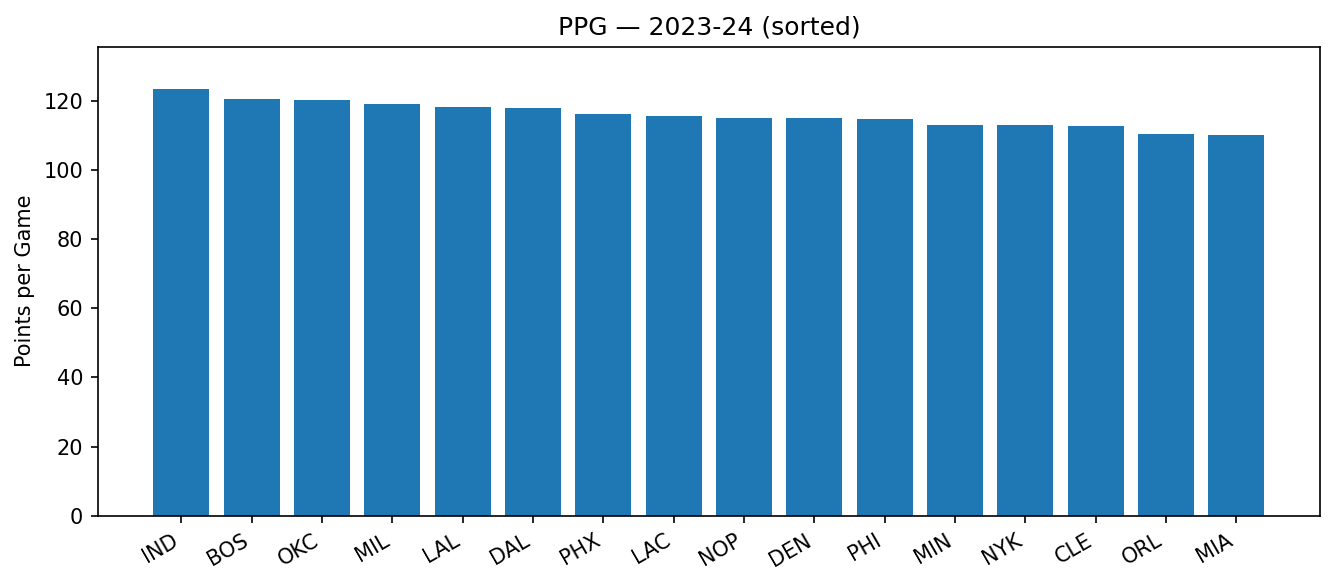

In [ ]:
import matplotlib.pyplot as plt, numpy as np

df = top16.dropna(subset=["PPG"]).sort_values("PPG", ascending=False)

plt.figure(figsize=(9,4))
x = np.arange(len(df))
plt.bar(x, df["PPG"].values)
plt.xticks(x, df["TEAM_ABBREVIATION"].values, rotation=30, ha="right")
plt.ylabel("Points per Game")
plt.title(f"PPG — {season} (sorted)")
plt.ylim(0, max(5 + df["PPG"].max(), df["PPG"].max()*1.1))
plt.tight_layout()
plt.show()


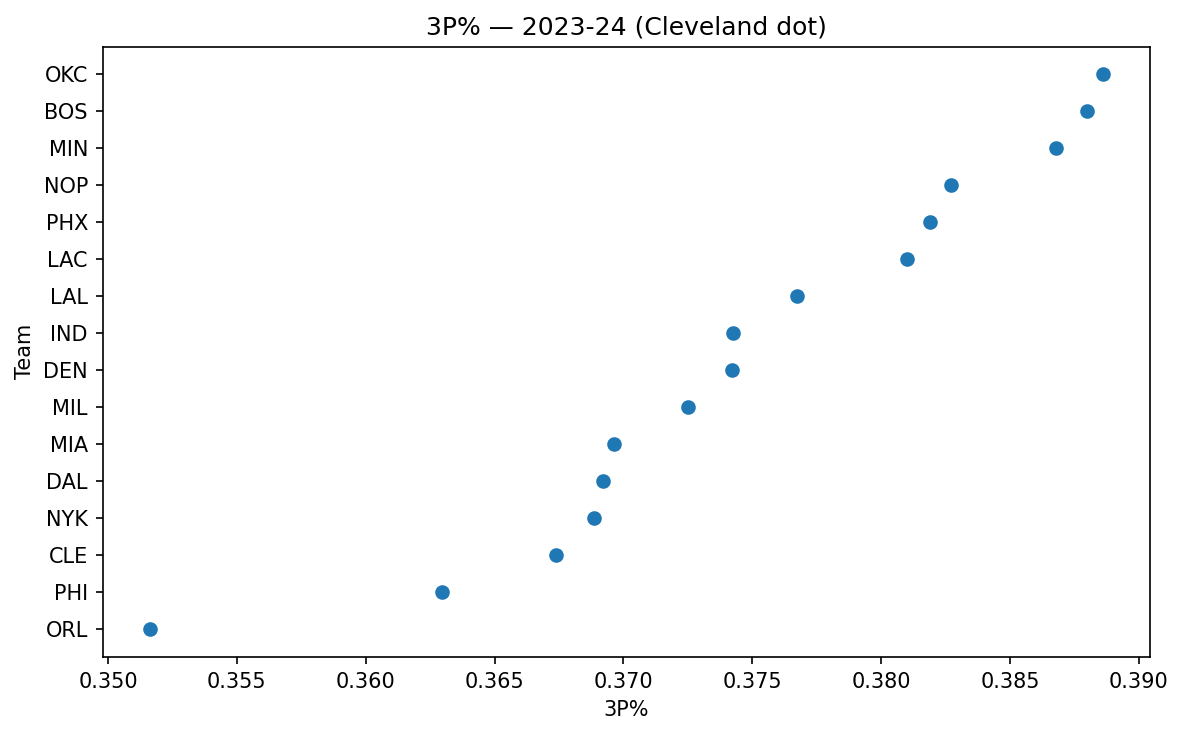

In [55]:
metric = "FG3_PCT_SUM"
df2 = top16[top16.SEASON_YEAR==season].dropna(subset=[metric]).sort_values(metric)

plt.figure(figsize=(8,5))
y = np.arange(len(df2))
plt.plot(df2[metric].values, y, 'o')
plt.yticks(y, df2["TEAM_ABBREVIATION"].values)
plt.xlabel("3P%")
plt.ylabel("Team")
plt.title(f"3P% — {season} (Cleveland dot)")
plt.tight_layout()
plt.show()


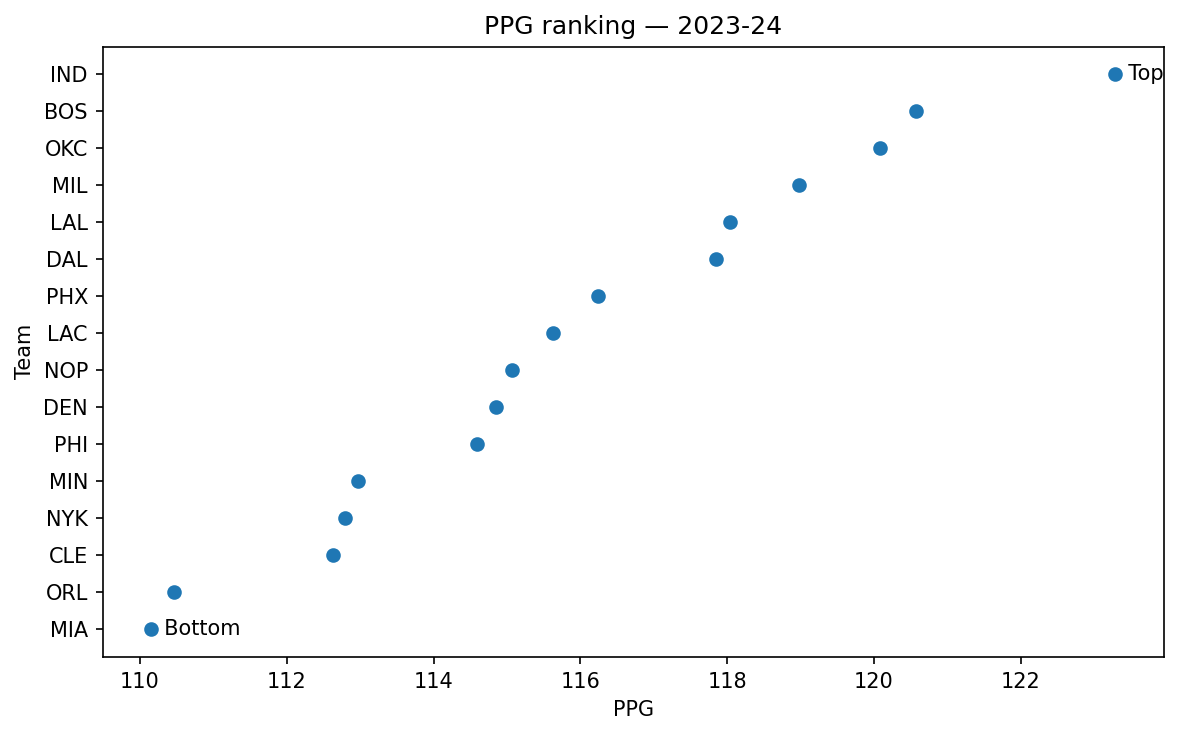

In [56]:
df = top16[top16.SEASON_YEAR==season].dropna(subset=["PPG"]).sort_values("PPG")

plt.figure(figsize=(8,5))
y = np.arange(len(df))
plt.plot(df["PPG"].values, y, 'o')
plt.yticks(y, df["TEAM_ABBREVIATION"].values)
plt.xlabel("PPG")
plt.ylabel("Team")
plt.title(f"PPG ranking — {season}")
plt.text(df["PPG"].iloc[-1], y[-1], "  Top", va="center")
plt.text(df["PPG"].iloc[0],  y[0],  "  Bottom", va="center")
plt.tight_layout()
plt.show()


In [67]:
top16.head()

,SEASON_YEAR,TEAM_NAME,TEAM_ABBREVIATION,TEAM_ID,G,W,L,FGM,FGA,FG3M,...,PTS,PLUS_MINUS,MIN,WIN_PCT,PPG,APG,RPG,FG3_PCT_SUM,FG_PCT_SUM,FT_PCT_SUM
0,2023-24,Boston Celtics,BOS,1610612738,82,64,18,3601,7396,1351,...,9887,930.0,3966.0,0.780488,120.573171,26.914634,46.329268,0.387995,0.486885,0.806530
1,2023-24,Denver Nuggets,DEN,1610612743,82,57,25,3610,7279,958,...,9418,431.0,3941.0,0.695122,114.853659,29.451220,44.426829,0.374219,0.495947,0.761671
2,2023-24,Oklahoma City Thunder,OKC,1610612760,82,57,25,3653,7324,1090,...,9847,608.0,3961.0,0.695122,120.085366,27.109756,42.036585,0.388592,0.498771,0.824901
3,2023-24,Minnesota Timberwolves,MIN,1610612750,82,56,26,3383,6974,1037,...,9264,529.0,3961.0,0.682927,112.975610,26.634146,43.621951,0.386796,0.485087,0.776715
4,2023-24,LA Clippers,LAC,1610612746,82,51,31,3473,7108,1036,...,9481,269.0,3941.0,0.621951,115.621951,25.573171,42.963415,0.381022,0.488604,0.824986


## 2) NBA — Before/After (two seasons)

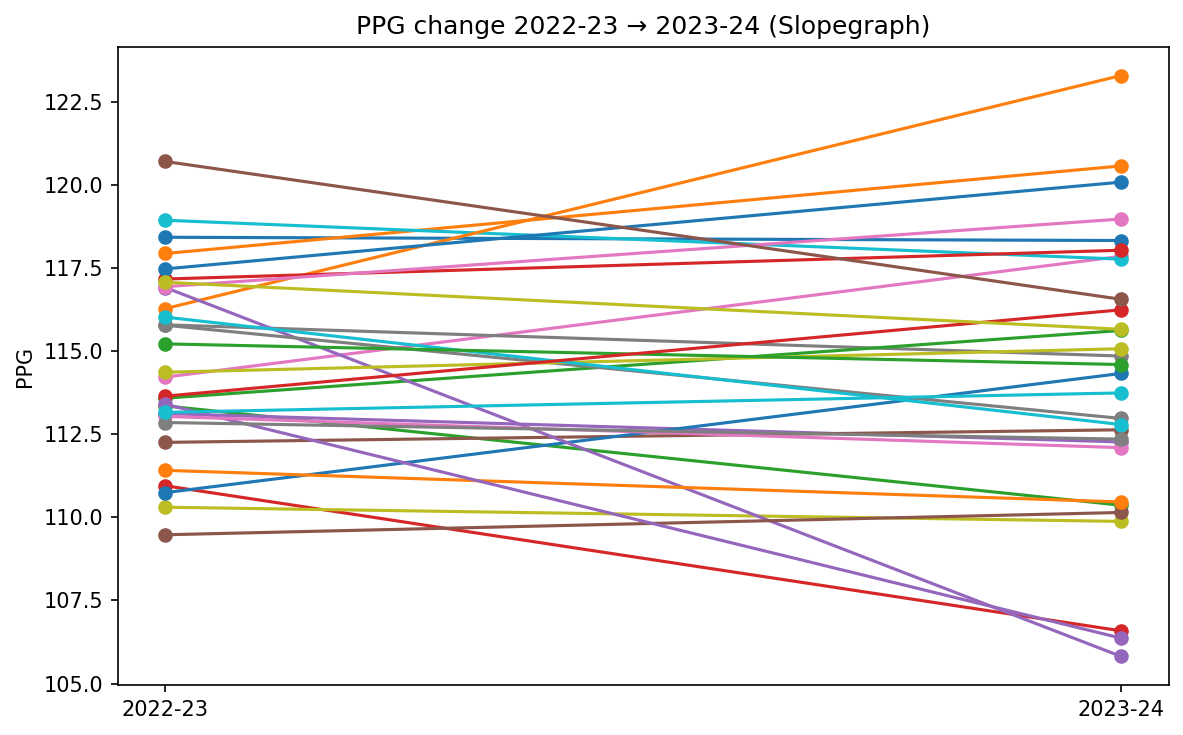

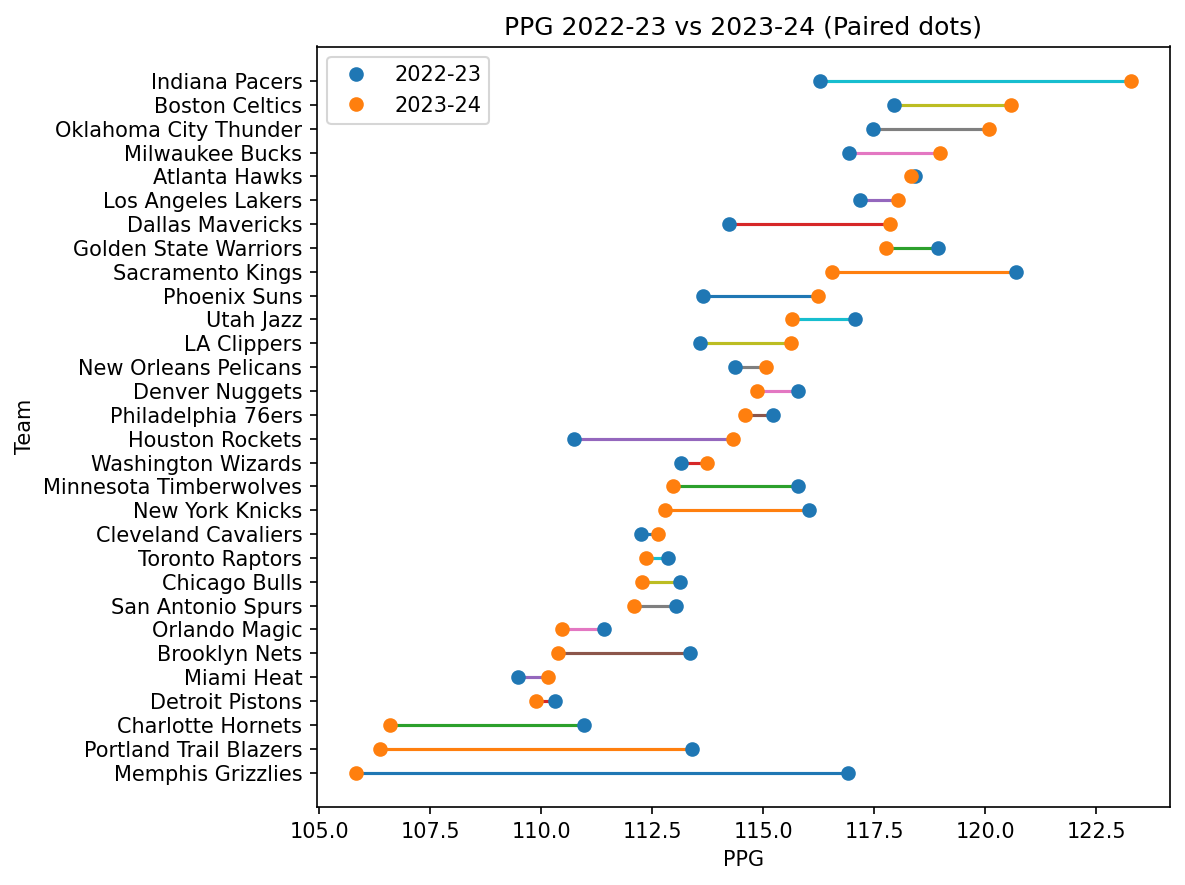

In [ ]:
seasons = sorted(team_season["SEASON_YEAR"].unique())
s0, s1 = seasons[-2], seasons[-1]

sub = team_season[team_season.SEASON_YEAR.isin([s0, s1])]

piv = sub.pivot(index="TEAM_NAME", columns="SEASON_YEAR", values="PPG").dropna()

# Slopegraph
plt.figure(figsize=(8,5))
for t in piv.index:
    plt.plot([0,1], [piv.loc[t, s0], piv.loc[t, s1]], marker='o')
plt.xticks([0,1], [s0, s1]); plt.ylabel("PPG")
plt.title(f"PPG change {s0} → {s1} (Slopegraph)")
plt.tight_layout(); plt.show()

# Paired dots (dumbbell)
piv2 = piv.sort_values(s1)
plt.figure(figsize=(8,6))
yy = np.arange(len(piv2))
for i, t in enumerate(piv2.index):
    plt.plot([piv2.loc[t, s0], piv2.loc[t, s1]], [yy[i], yy[i]], '-')
plt.plot(piv2[s0].values, yy, 'o', label=str(s0))
plt.plot(piv2[s1].values, yy, 'o', label=str(s1))
plt.yticks(yy, piv2.index.tolist())
plt.xlabel("PPG"); plt.ylabel("Team"); plt.title(f"PPG {s0} vs {s1} (Paired dots)")
plt.legend(); plt.tight_layout(); plt.show()


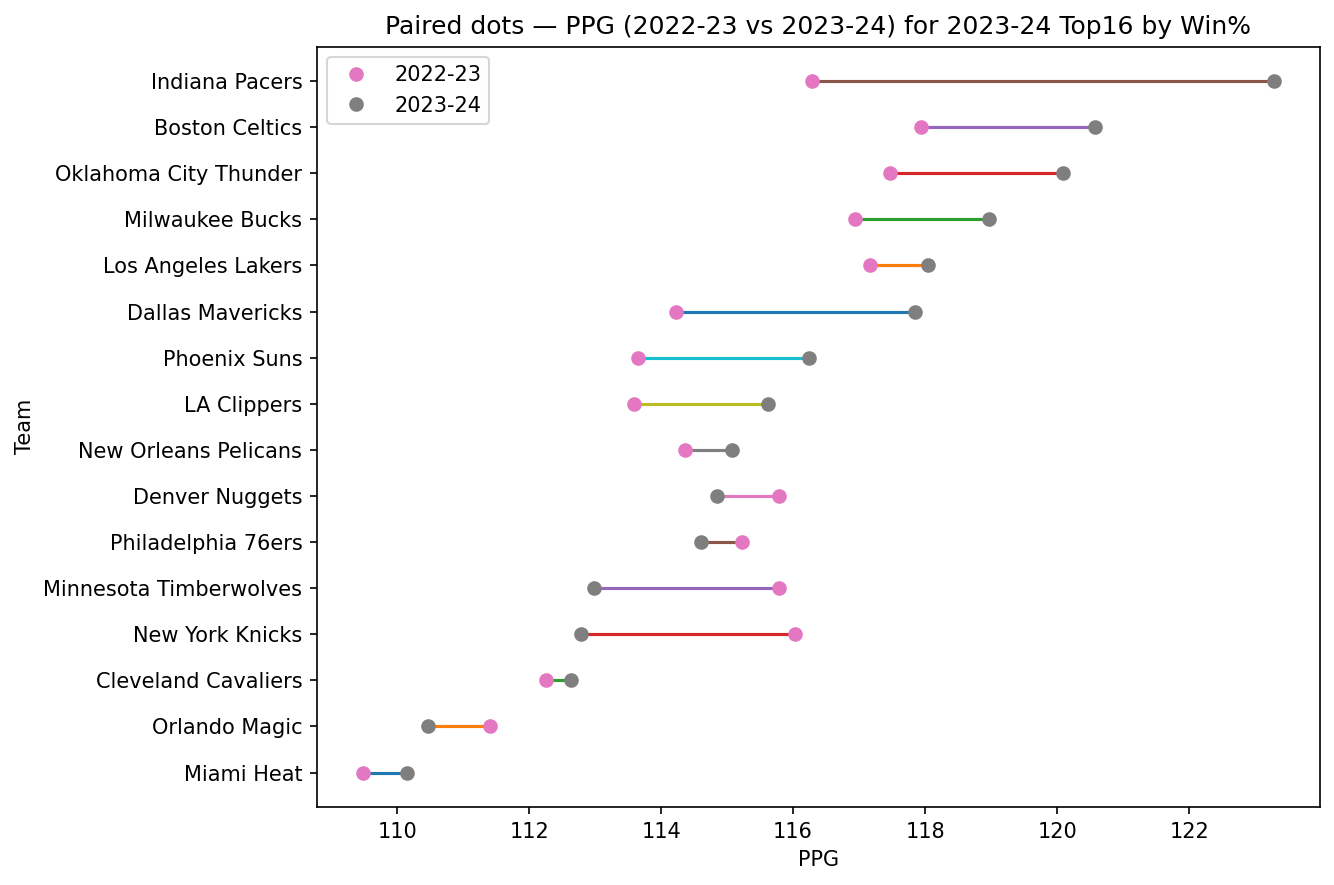

In [ ]:
import numpy as np, matplotlib.pyplot as plt

sub = team_season[team_season["TEAM_NAME"].isin(top16["TEAM_NAME"]) & team_season["SEASON_YEAR"].isin([s0,s1])]
piv = sub.pivot(index="TEAM_NAME", columns="SEASON_YEAR", values="PPG").dropna()

# Paired dots
piv2 = piv.sort_values(s1)

yy = np.arange(len(piv2))
plt.figure(figsize=(9,6))
for i, t in enumerate(piv2.index):
    plt.plot([piv2.loc[t, s0], piv2.loc[t, s1]], [yy[i], yy[i]], '-')
plt.plot(piv2[s0].values, yy, 'o', label=str(s0))
plt.plot(piv2[s1].values, yy, 'o', label=str(s1))
plt.yticks(yy, piv2.index.tolist())
plt.xlabel("PPG")
plt.ylabel("Team")
plt.title(f"Paired dots — PPG ({s0} vs {s1}) for {s1} Top16 by Win%")

plt.legend()

plt.tight_layout()
plt.show()


## 3) NBA — PPG over time (trends & small multiples)

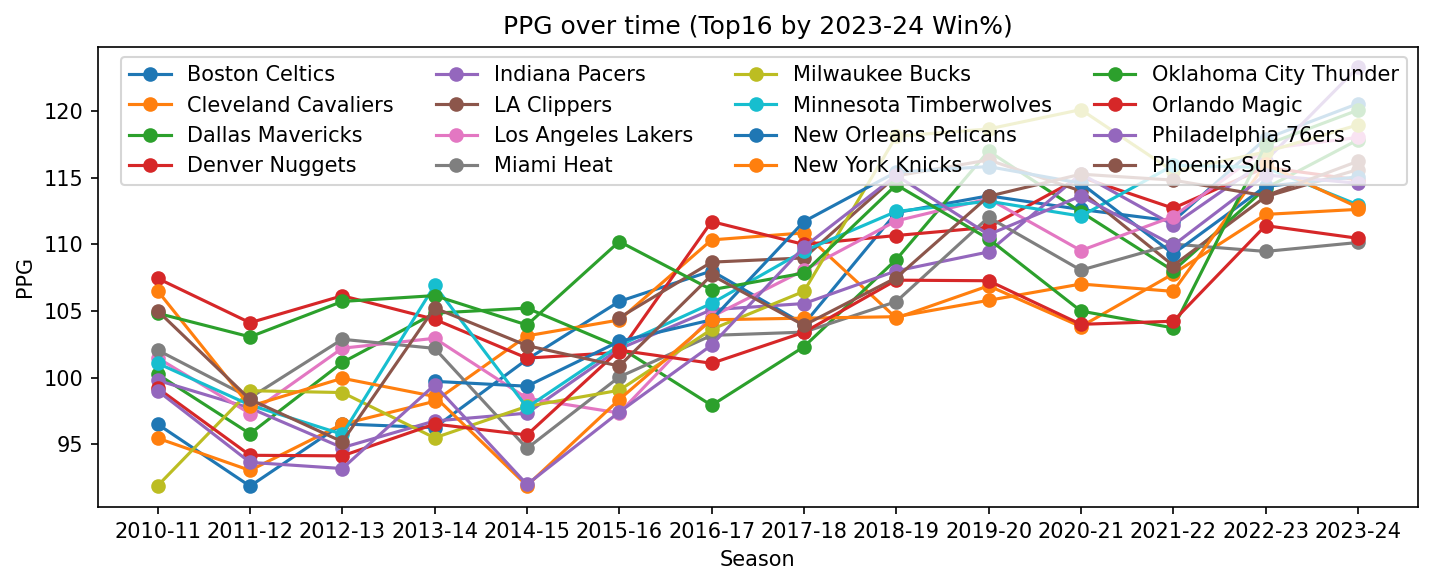

In [85]:
watch = top16["TEAM_NAME"].tolist()  # top16 of chosen season
pivot = (team_season[team_season["TEAM_NAME"].isin(watch)].pivot(index="SEASON_YEAR", columns="TEAM_NAME", values="PPG"))

# Trend lines in one panel
plt.figure(figsize=(10,4))
for t in pivot.columns:
    s = pivot[t].dropna()
    plt.plot(s.index, s.values, marker='o', label=t)
plt.xlabel("Season"); plt.ylabel("PPG")
plt.title(f"PPG over time (Top16 by {season} Win%)")
plt.legend(ncol=4)
# plt.legend(ncol=4, bbox_to_anchor=(0.5, -0.2), loc="upper center")

plt.tight_layout()
plt.show()



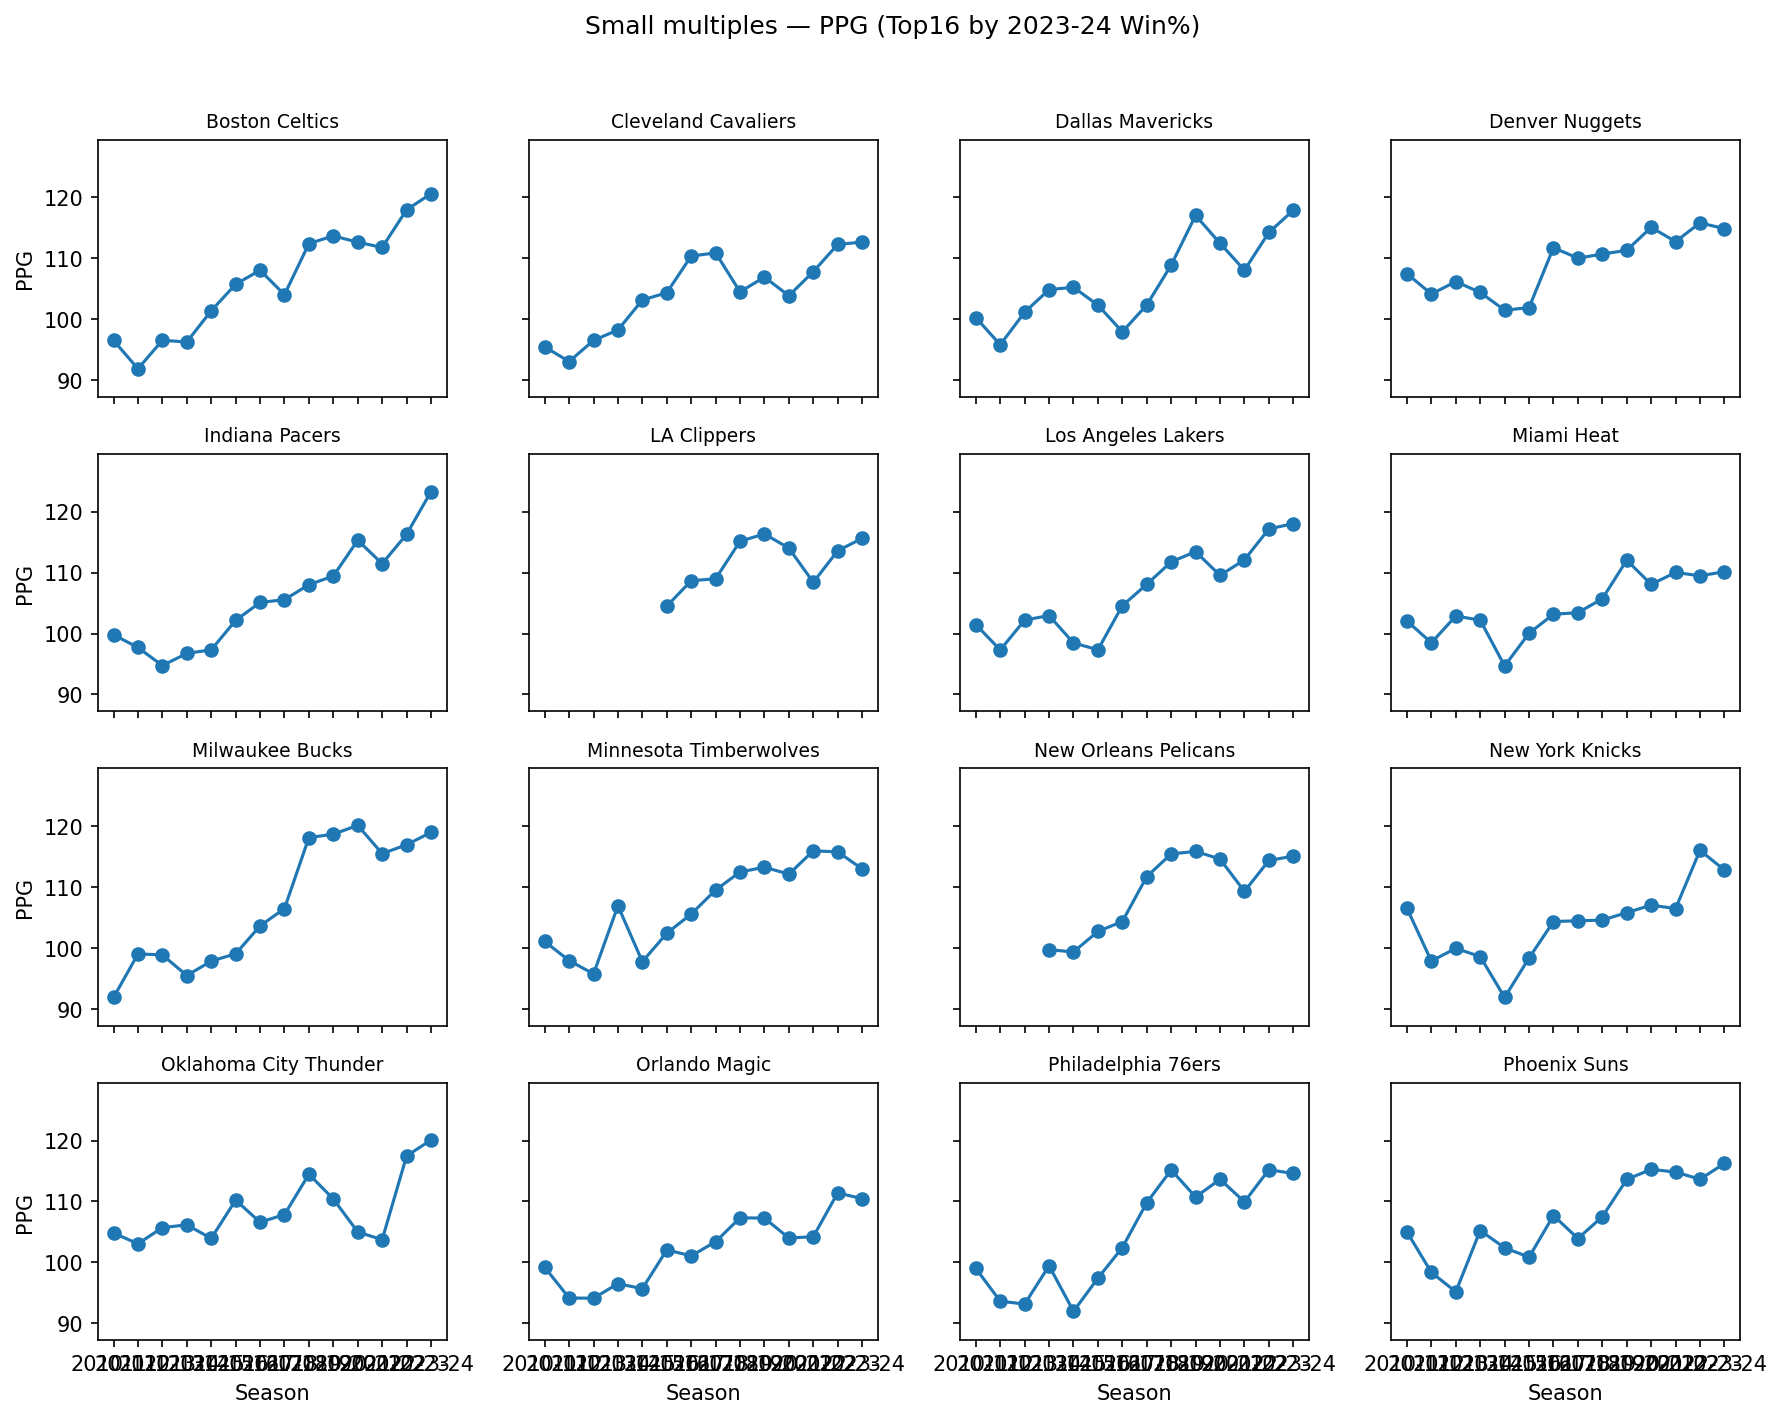

In [121]:
# Small multiples (shared axes)
teams = list(pivot.columns)
n, cols = len(teams), 4
rows = math.ceil(n/cols)
fig, axes = plt.subplots(rows, cols, figsize=(3.0*cols, 2.4*rows), sharex=True, sharey=True)
axes = axes.flatten()
ymin = pivot.min().min()*0.95
ymax = pivot.max().max()*1.05

for i, t in enumerate(teams):
    ax = axes[i]
    s = pivot[t].dropna()
    ax.plot(s.index, s.values, marker='o')
    ax.set_title(t, fontsize=9)
    ax.set_ylim(ymin, ymax)
    r, c = divmod(i, cols)
    if r == rows-1: 
        ax.set_xlabel("Season")
    if c == 0:
        ax.set_ylabel("PPG")
for j in range(i+1, rows*cols): 
    axes[j].set_visible(False)


fig.suptitle(f"Small multiples — PPG (Top16 by {season} Win%)", y=0.98, fontsize=12)
fig.tight_layout(rect=[0,0,1,0.96])
plt.show()


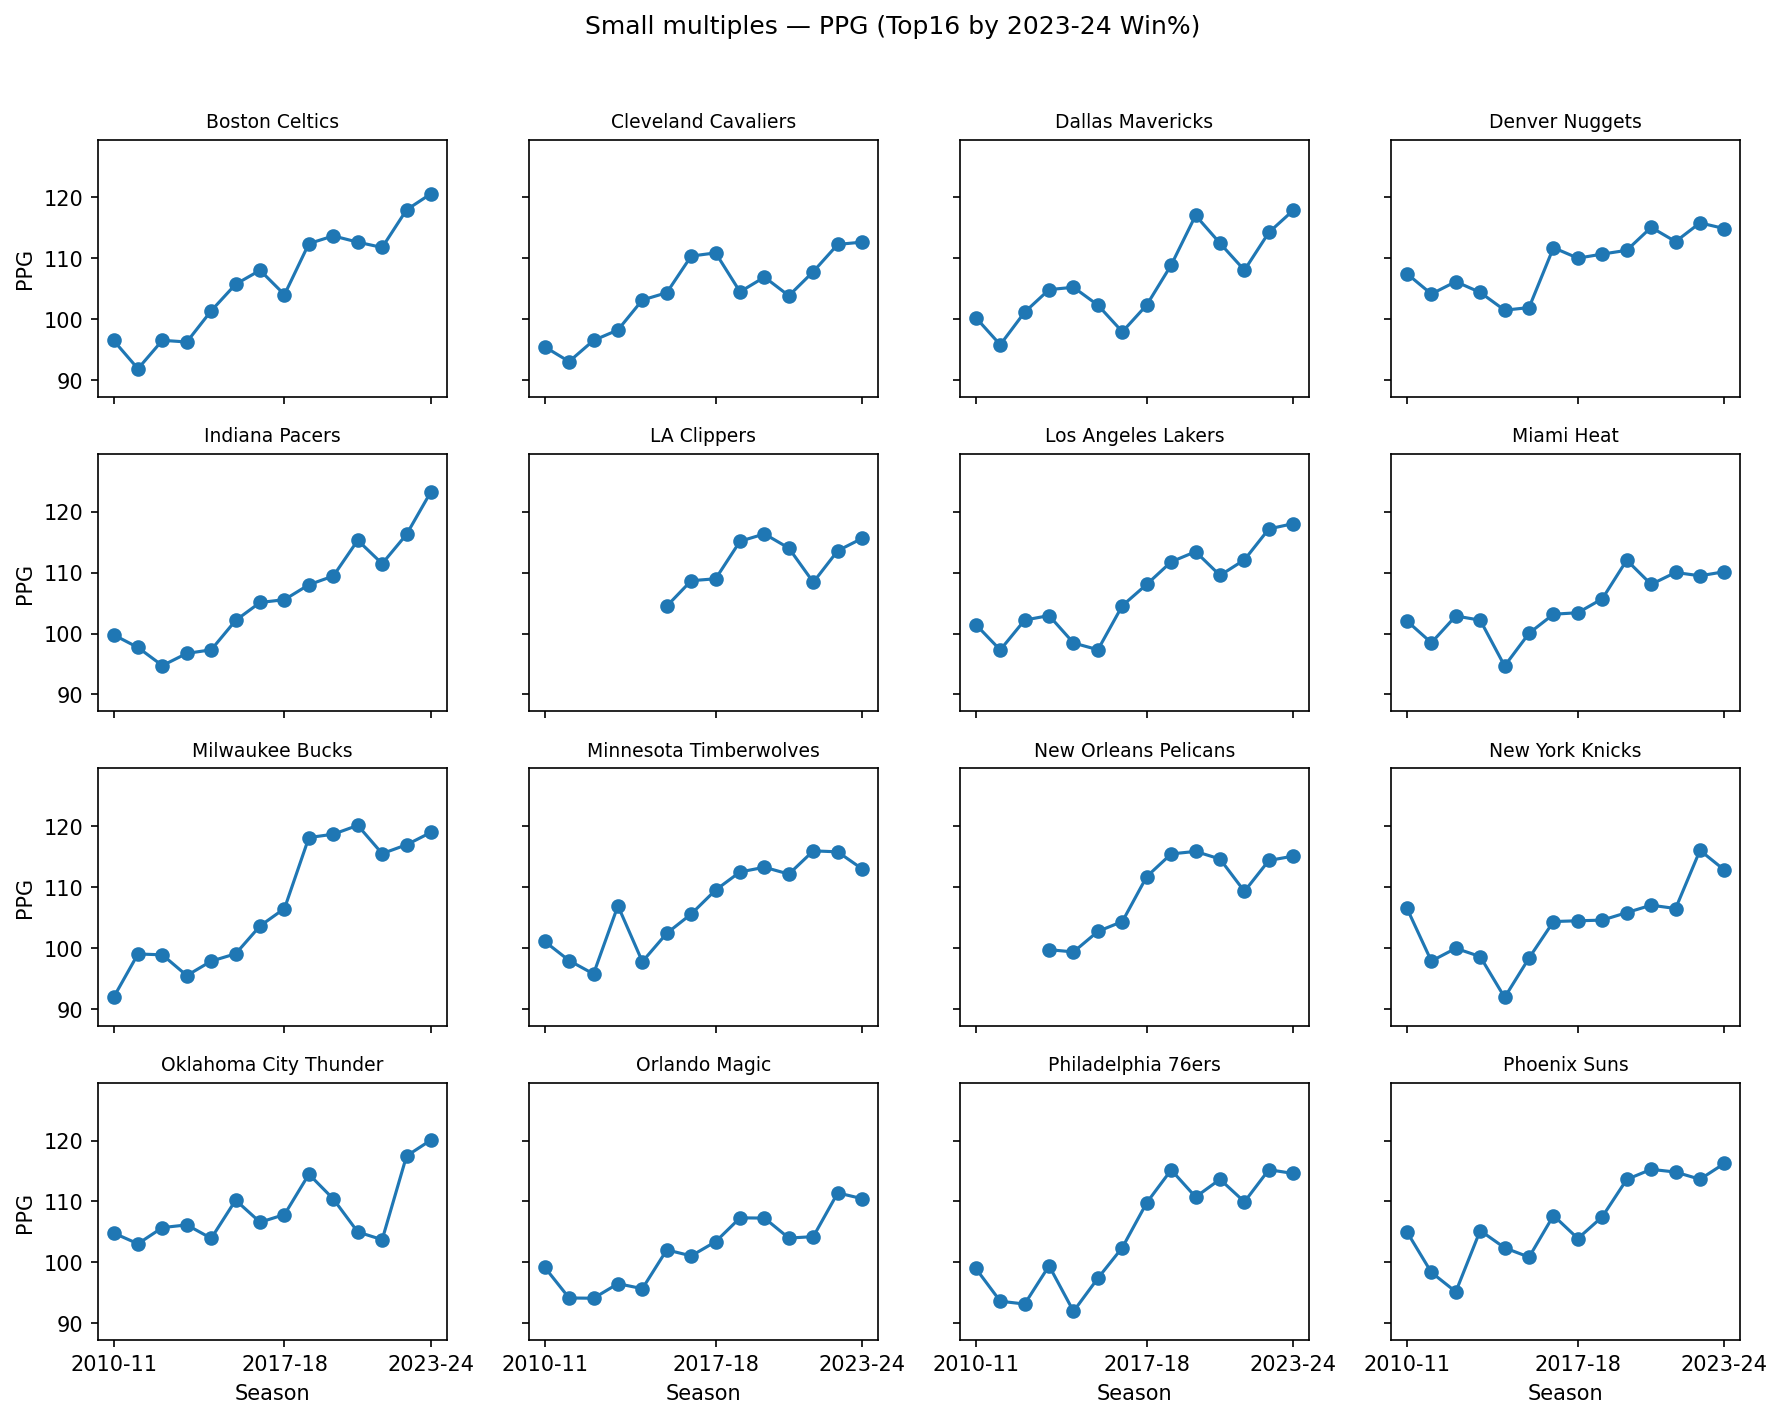

In [94]:
teams = list(pivot.columns)
n, cols = len(teams), 4            # adjust columns as you like
rows = math.ceil(n/cols)

fig, axes = plt.subplots(rows, cols, figsize=(3.0*cols, 2.4*rows), sharex=True, sharey=True)
axes = axes.flatten()

# y-limits identical across panels
ymin = pivot.min().min()*0.95
ymax = pivot.max().max()*1.05

# choose tick mode: "first_last" or "first_mid_last"
tick_mode = "first_mid_last"   # change to "first_last" if you prefer fewer ticks

# seasons (shared x) as a sorted list
seasons = sorted(pivot.index.tolist())
if len(seasons) >= 2:
    first_tick = seasons[0]
    last_tick  = seasons[-1]
    mid_tick   = seasons[len(seasons)//2]

for i, t in enumerate(teams):
    ax = axes[i]
    s = pivot[t].dropna()
    ax.plot(s.index, s.values, marker='o')
    ax.set_title(t, fontsize=9)
    ax.set_ylim(ymin, ymax)

    r, c = divmod(i, cols)
    # y-label only on first column
    if c == 0:
        ax.set_ylabel("PPG")

    # show compact x-ticks only on the LAST ROW
    if r == rows - 1:
        if tick_mode == "first_last":
            xticks = [first_tick, last_tick]
        else:  # "first_mid_last"
            xticks = [first_tick] + [mid_tick] + [last_tick]
        ax.set_xticks(xticks)
        ax.set_xticklabels([str(x) for x in xticks])
        ax.set_xlabel("Season")
    else:
        # hide labels for inner rows (sharex keeps alignment)
        ax.set_xlabel("")
        ax.set_xticklabels([])

# hide any extra empty panels
for j in range(i+1, rows*cols):
    axes[j].set_visible(False)

fig.suptitle(f"Small multiples — PPG (Top16 by {season} Win%)", y=0.98, fontsize=12)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 4) NBA Top 16 team scoring — Part-to-whole (stacked bar)

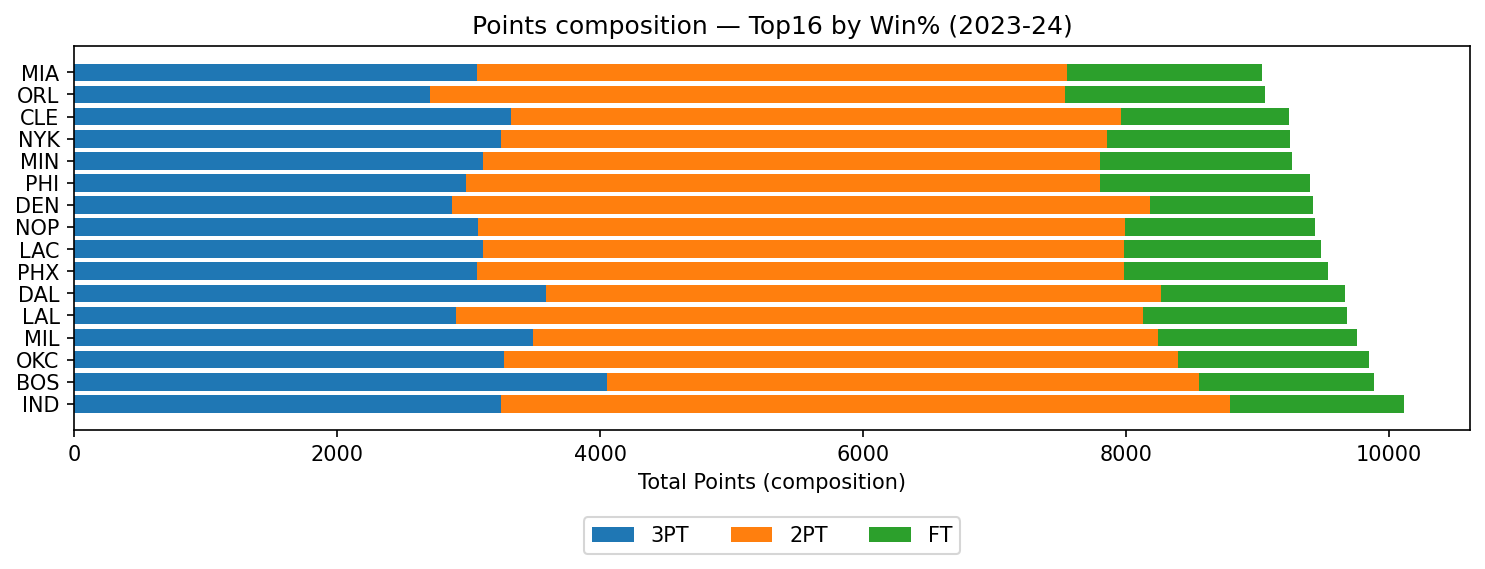

In [89]:
comp = top16.copy()
comp["PTS_3"]  = comp["FG3M"] * 3
comp["PTS_2"]  = (comp["FGM"] - comp["FG3M"]) * 2
comp["PTS_FT"] = comp["FTM"] * 1

comp = comp.sort_values("PTS", ascending=False).reset_index(drop=True)

y = np.arange(len(comp)); left = np.zeros(len(comp))
plt.figure(figsize=(10,4))
for label, vals in [("3PT", comp["PTS_3"]), ("2PT", comp["PTS_2"]), ("FT", comp["PTS_FT"])]:
    plt.barh(y, vals, left=left, label=label)
    left += vals
plt.yticks(y, comp["TEAM_ABBREVIATION"])
plt.xlabel("Total Points (composition)")
plt.title(f"Points composition — Top16 by Win% ({season})")
plt.legend(ncol=3, bbox_to_anchor=(0.5, -0.2), loc="upper center")
plt.tight_layout()
plt.show()


In [97]:
top16.head()

,SEASON_YEAR,TEAM_NAME,TEAM_ABBREVIATION,TEAM_ID,G,W,L,FGM,FGA,FG3M,...,PTS,PLUS_MINUS,MIN,WIN_PCT,PPG,APG,RPG,FG3_PCT_SUM,FG_PCT_SUM,FT_PCT_SUM
0,2023-24,Boston Celtics,BOS,1610612738,82,64,18,3601,7396,1351,...,9887,930.0,3966.0,0.780488,120.573171,26.914634,46.329268,0.387995,0.486885,0.806530
1,2023-24,Denver Nuggets,DEN,1610612743,82,57,25,3610,7279,958,...,9418,431.0,3941.0,0.695122,114.853659,29.451220,44.426829,0.374219,0.495947,0.761671
2,2023-24,Oklahoma City Thunder,OKC,1610612760,82,57,25,3653,7324,1090,...,9847,608.0,3961.0,0.695122,120.085366,27.109756,42.036585,0.388592,0.498771,0.824901
3,2023-24,Minnesota Timberwolves,MIN,1610612750,82,56,26,3383,6974,1037,...,9264,529.0,3961.0,0.682927,112.975610,26.634146,43.621951,0.386796,0.485087,0.776715
4,2023-24,LA Clippers,LAC,1610612746,82,51,31,3473,7108,1036,...,9481,269.0,3941.0,0.621951,115.621951,25.573171,42.963415,0.381022,0.488604,0.824986


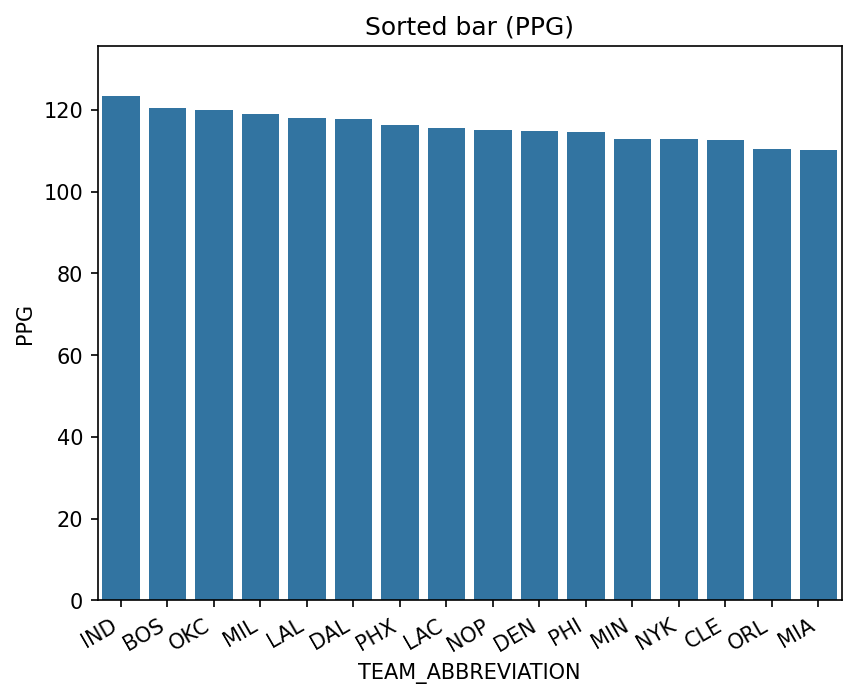

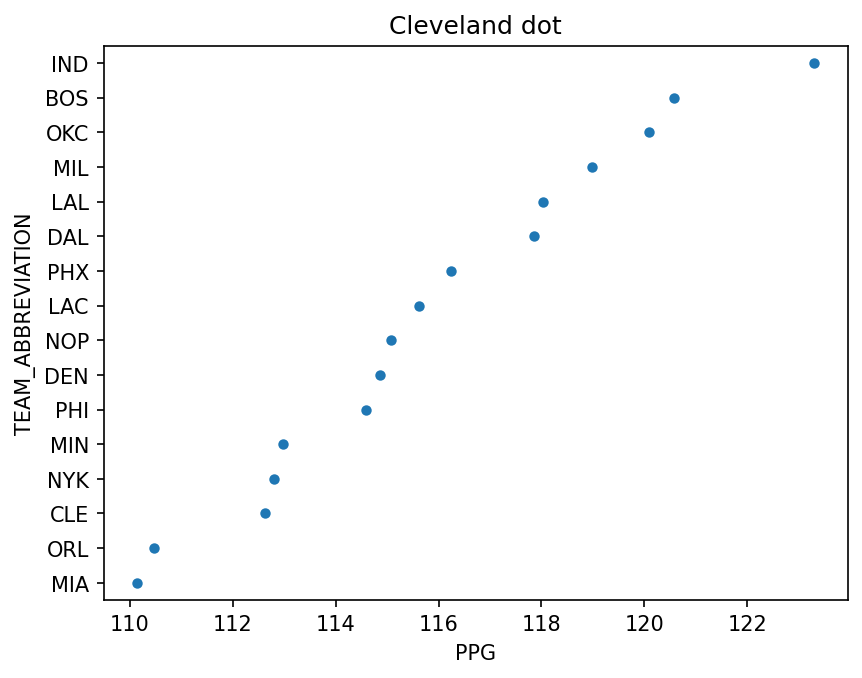

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sorted bar (PPG)
df = top16.copy()
df_bar = df[df.SEASON_YEAR.eq(df.SEASON_YEAR.max())].sort_values("PPG", ascending=False)
sns.barplot(data=df_bar, x="TEAM_ABBREVIATION", y="PPG")
plt.xticks(rotation=30, ha="right")
plt.ylabel("PPG")
plt.title("Sorted bar (PPG)")
plt.ylim(0, df_bar["PPG"].max()*1.1)
plt.show()

# # Cleveland dot
df_dot = df_bar.sort_values("PPG", ascending=False)
sns.stripplot(data=df_dot, x="PPG", y="TEAM_ABBREVIATION", jitter=False)  # or sns.pointplot(join=False)
plt.title("Cleveland dot")
plt.show()

# # Slopegraph (two seasons)
# df2 = df[df.season.isin([2023, 2024])]
# sns.lineplot(data=df2, x="season", y="value", hue="team", marker="o", legend=False)
# plt.title("Slopegraph")

# # Small multiples (shared scales)
# sns.relplot(data=df, x="season", y="value", kind="line", col="team", col_wrap=4, facet_kws={"sharey": True, "sharex": True})

# # Uncertainty ribbon (auto CI/SE)
# sns.lineplot(data=df, x="season", y="value", hue="team", errorbar="se")  # or "ci"

In [106]:
import altair as alt


# # Cleveland dot
dot = alt.Chart(top16).mark_point().encode(
    x="PPG:Q",
    y=alt.Y("TEAM_NAME:N", sort=top16["TEAM_NAME"].tolist()),
    tooltip=["TEAM_NAME","PPG"]
)

dot.show()


alt.Chart(...)

In [122]:
import plotly.express as px
import plotly.graph_objects as go

df = top16[top16.SEASON_YEAR==season].dropna(subset=["PPG"]).sort_values("PPG", ascending=False)


# Sorted bar
fig = px.bar(df, x="TEAM_NAME", y="PPG", title="Sorted bar (PPG)")
fig.update_xaxes(categoryorder="array", categoryarray=df["TEAM_NAME"])
fig.show()

# Cleveland dot
fig = px.scatter(df, x="PPG", y="TEAM_NAME", title="Cleveland dot", hover_data=["TEAM_NAME","PPG"])
fig.show()


## 5) Optional — Shaded ribbons (uncertainty)

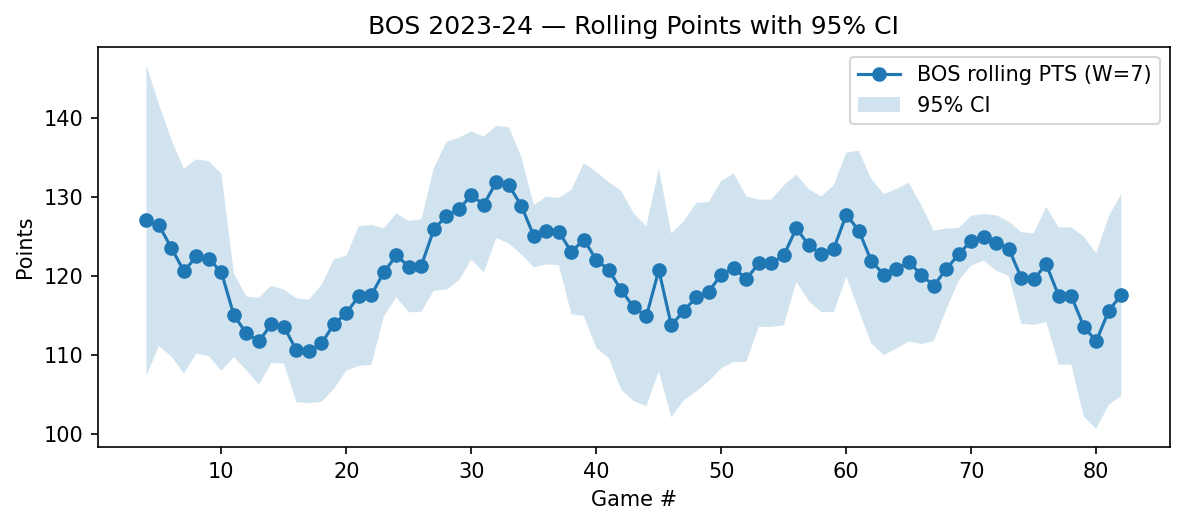

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load your file ---

season = raw["SEASON_YEAR"].max()
team   = "BOS"  # TEAM_ABBREVIATION, e.g., BOS, DEN, LAL, etc.

df = (raw.loc[(raw.SEASON_YEAR==season) & (raw.TEAM_ABBREVIATION==team),
              ["GAME_DATE","PTS"]]
        .sort_values("GAME_DATE")
        .reset_index(drop=True))

# Game index for x-axis
df["game_idx"] = np.arange(1, len(df)+1)

# Rolling mean & SE over a window (e.g., last 7 games)
W = 7
roll = df["PTS"].rolling(W, min_periods=4)
mean = roll.mean()
std  = roll.std(ddof=1)
n    = roll.count()
se   = std / np.sqrt(n)                 # standard error
z    = 1.96                             # 95% CI
lo, hi = mean - z*se, mean + z*se

# --- Plot: line + shaded ribbon ---
plt.figure(figsize=(8,3.6))
plt.plot(df["game_idx"], mean, marker='o', label=f"{team} rolling PTS (W={W})")
plt.fill_between(df["game_idx"], lo, hi, alpha=0.2, label="95% CI")
plt.xlabel("Game #")
plt.ylabel("Points")
plt.title(f"{team} {season} — Rolling Points with 95% CI")
plt.legend()
plt.tight_layout()


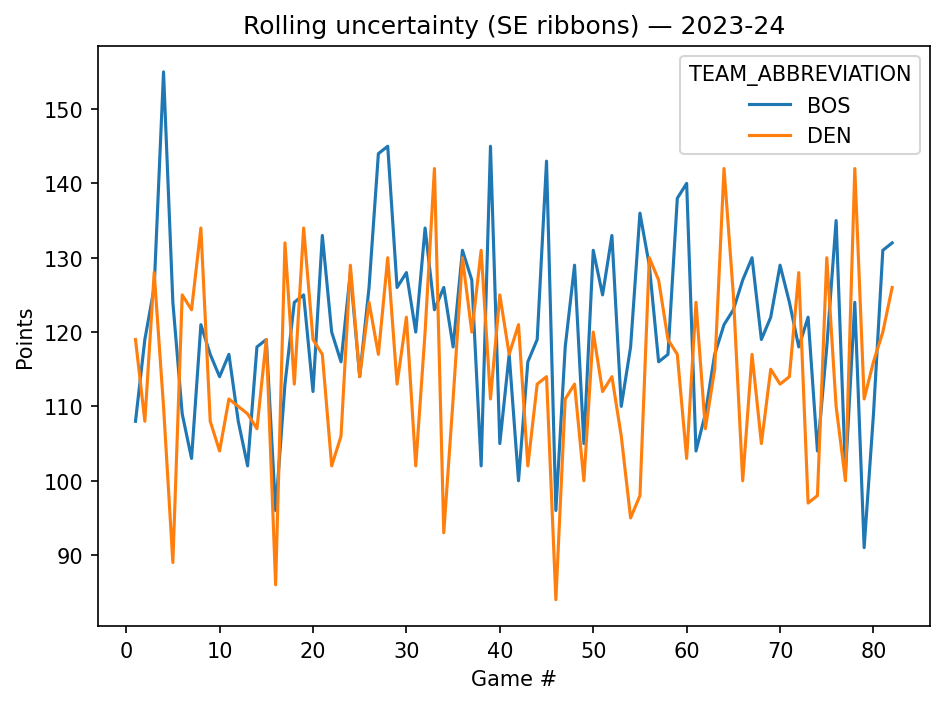

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

sub = raw.loc[raw.SEASON_YEAR==season].copy()
# Example: compare two teams (set your own list)
keep = ["BOS","DEN"]
sub = sub[sub.TEAM_ABBREVIATION.isin(keep)].sort_values(["TEAM_ABBREVIATION","GAME_DATE"])

# Give each row a game index per team
sub["game_idx"] = sub.groupby("TEAM_ABBREVIATION").cumcount() + 1

# Seaborn draws ribbons automatically with errorbar='se' or 'ci'
sns.lineplot(data=sub, x="game_idx", y="PTS", hue="TEAM_ABBREVIATION", errorbar="se")
plt.xlabel("Game #")
plt.ylabel("Points")
plt.title(f"Rolling uncertainty (SE ribbons) — {season}")
plt.tight_layout()
plt.show()


<positron-console-cell-135>:24: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



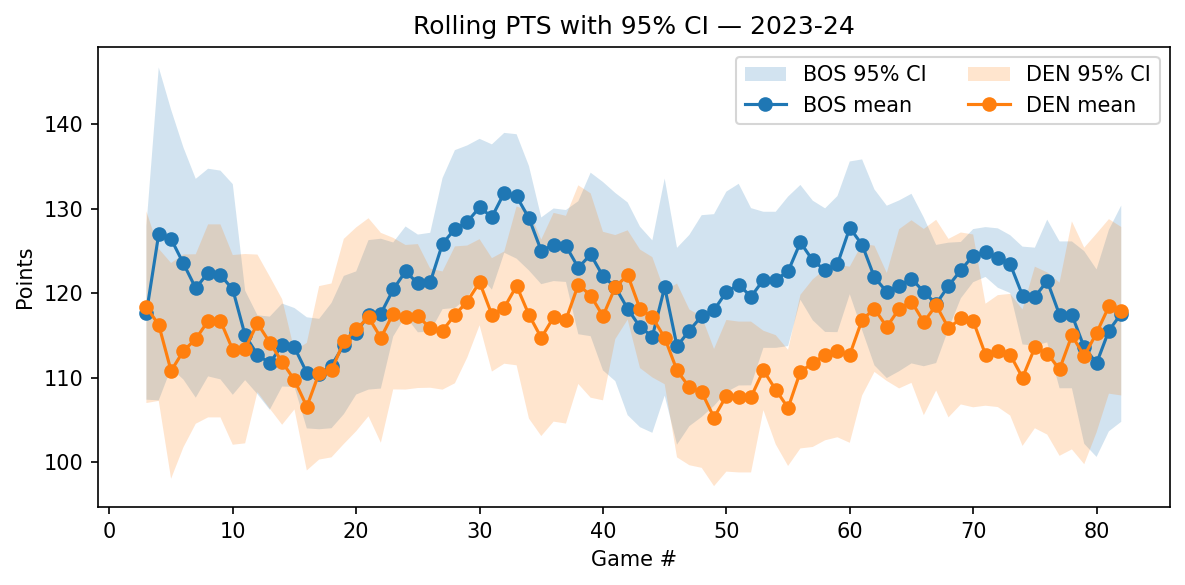

In [ ]:
season = raw["SEASON_YEAR"].max()
teams  = ["BOS","DEN"]     # pick any two
W, z   = 7, 1.96          # window & 95% CI (use z=1.0 for ±1 SE)

sub = (raw[(raw.SEASON_YEAR==season) & (raw.TEAM_ABBREVIATION.isin(teams))]
         .sort_values(["TEAM_ABBREVIATION","GAME_DATE"]).copy())
sub["game_idx"] = sub.groupby("TEAM_ABBREVIATION").cumcount() + 1

def rolling_ci(df, col="PTS", w=W, z=z):
    roll = df[col].rolling(w, min_periods=max(3, w//2))
    mean = roll.mean()
    sd   = roll.std(ddof=1)
    n    = roll.count()
    se   = sd / np.sqrt(n)
    out = df[["TEAM_ABBREVIATION","game_idx"]].copy()
    out["mean"] = mean
    out["lo"]   = mean - z*se
    out["hi"]   = mean + z*se
    return out.dropna()

ci = sub.groupby("TEAM_ABBREVIATION", group_keys=False).apply(rolling_ci)

plt.figure(figsize=(8,4))
for t, g in ci.groupby("TEAM_ABBREVIATION"):
    # ribbon
    plt.fill_between(g["game_idx"], g["lo"], g["hi"], alpha=0.2, label=f"{t} 95% CI")
    # mean line
    plt.plot(g["game_idx"], g["mean"], marker="o", label=f"{t} mean")

plt.xlabel("Game #"); plt.ylabel("Points")
plt.title(f"Rolling PTS with 95% CI — {season}")
plt.legend(ncol=2); plt.tight_layout(); plt.show()


In [128]:
import altair as alt
import pandas as pd
import numpy as np

# Build a summary frame with mean/lo/hi (e.g., by game_idx for one team)
df = (raw[(raw.SEASON_YEAR==season) & (raw.TEAM_ABBREVIATION==team)]
        .sort_values("GAME_DATE")[["GAME_DATE","PTS"]]
        .reset_index(drop=True))
df["game_idx"] = np.arange(1, len(df)+1)

W = 7
roll = df["PTS"].rolling(W, min_periods=4)
mean = roll.mean(); std = roll.std(ddof=1); n = roll.count()
se   = std/np.sqrt(n); z = 1.96
df_ci = pd.DataFrame({
    "game_idx": df["game_idx"],
    "mean": mean,
    "lo": mean - z*se,
    "hi": mean + z*se
}).dropna()

ribbon = alt.Chart(df_ci).mark_area(opacity=0.2).encode(
    x="game_idx:Q", y="lo:Q", y2="hi:Q"
)
line = alt.Chart(df_ci).mark_line(point=True).encode(
    x="game_idx:Q", y="mean:Q"
)
(ribbon + line).properties(title=f"{team} {season} — Rolling PTS with 95% CI")


alt.LayerChart(...)

In [144]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'plotly_mimetype+notebook_connected'

# df_ci with columns: game_idx, mean, lo, hi (from the Matplotlib prep above)
x = df_ci["game_idx"]
mean = df_ci["mean"]
lo = df_ci["lo"]
hi = df_ci["hi"]

fig = go.Figure()
# Upper bound
fig.add_trace(go.Scatter(x=x, y=hi, line=dict(width=0), showlegend=False))
# Lower bound filled up to previous (creates the ribbon)
fig.add_trace(go.Scatter(x=x, y=lo, fill='tonexty', line=dict(width=0),
                         name='95% CI', opacity=0.2))
# Mean line
fig.add_trace(go.Scatter(x=x, y=mean, mode='lines+markers', name='Mean'))
fig.update_layout(title=f"{team} {season} — Rolling PTS with 95% CI",
                  xaxis_title="Game #", yaxis_title="Points")
fig.show()


In [141]:
pio.renderers.default = 'plotly_mimetype+notebook_connected'

# --- Parameters ---
season = raw["SEASON_YEAR"].max()        # pick any season
teams  = ["BOS", "DEN"]                  # change to your two teams (TEAM_ABBREVIATION)
W = 7                                    # rolling window size
z = 1.96                                 # 95% CI (use 1.0 for ±1 SE)

# --- Prep: per-team game index within the season ---
sub = (raw[(raw.SEASON_YEAR == season) & (raw.TEAM_ABBREVIATION.isin(teams))]
       .sort_values(["TEAM_ABBREVIATION","GAME_DATE"])
       .copy())
sub["game_idx"] = sub.groupby("TEAM_ABBREVIATION").cumcount() + 1

def ci_frame(df_team, window=W, z=z):
    roll = df_team["PTS"].rolling(window, min_periods=max(3, window//2))
    mean = roll.mean()
    std  = roll.std(ddof=1)
    n    = roll.count()
    se   = std / np.sqrt(n)
    lo, hi = mean - z*se, mean + z*se
    out = pd.DataFrame({
        "TEAM_ABBREVIATION": df_team["TEAM_ABBREVIATION"].values,
        "game_idx": df_team["game_idx"].values,
        "mean": mean.values,
        "lo": lo.values,
        "hi": hi.values,
    }).dropna()
    return out

ci = pd.concat([ci_frame(g) for indx, g in sub.groupby("TEAM_ABBREVIATION")], ignore_index=True)

# --- Plotly: two ribbons + two mean lines ---
fig = go.Figure()

for t in teams:
    tdf = ci[ci["TEAM_ABBREVIATION"] == t]

    # Upper bound (no line)
    fig.add_trace(go.Scatter(
        x=tdf["game_idx"], y=tdf["hi"],
        line=dict(width=0), showlegend=False, hoverinfo="skip",
        legendgroup=t, name=f"{t} CI upper"
    ))
    # Lower bound, filled to previous (creates the ribbon)
    fig.add_trace(go.Scatter(
        x=tdf["game_idx"], y=tdf["lo"],
        fill="tonexty", opacity=0.2, line=dict(width=0),
        name=f"{t} 95% CI", legendgroup=t
    ))
    # Mean line
    fig.add_trace(go.Scatter(
        x=tdf["game_idx"], y=tdf["mean"],
        mode="lines+markers", name=f"{t} mean", legendgroup=t
    ))

fig.update_layout(
    title=f"Rolling Points with 95% CI — {season} ({teams[0]} vs {teams[1]})",
    xaxis_title="Game #",
    yaxis_title="Points",
    hovermode="x unified"
)
fig.show()

## 6) Optional — Normalization

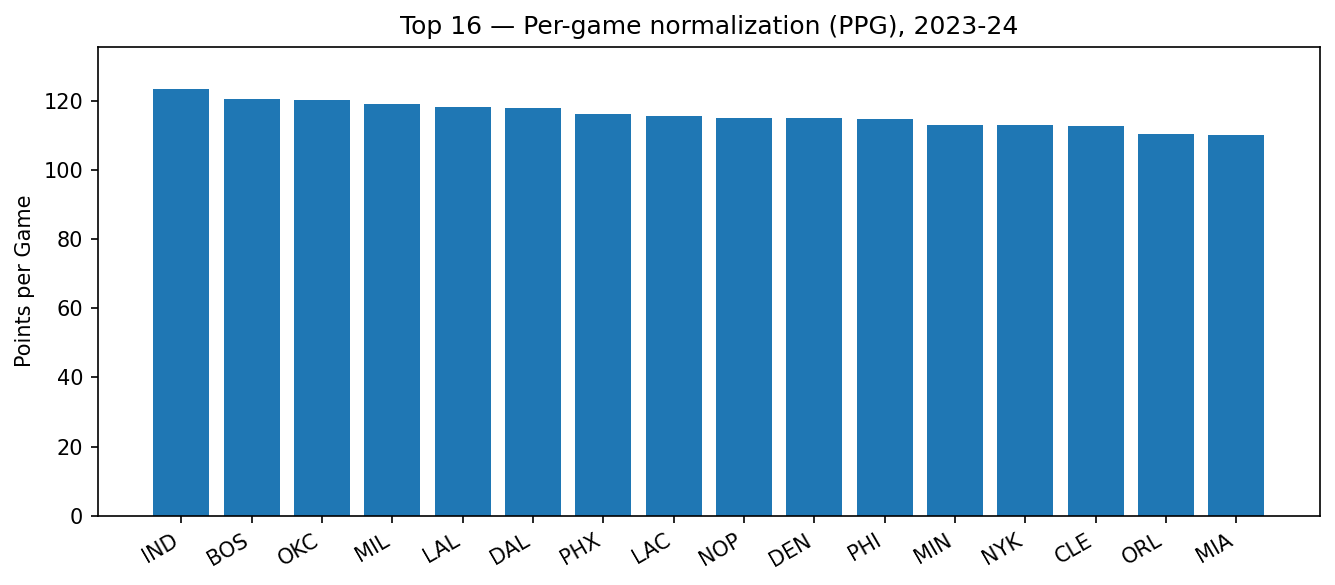

In [152]:
import matplotlib.pyplot as plt, numpy as np

# Show how totals vs per-game change the picture (PPG)
df = top16.sort_values("PPG", ascending=False)

plt.figure(figsize=(9,4))
x = np.arange(len(df))
plt.bar(x, df["PPG"].values)
plt.xticks(x, df["TEAM_ABBREVIATION"].values, rotation=30, ha="right")
plt.ylabel("Points per Game"); plt.title(f"Top 16 — Per-game normalization (PPG), {season}")
plt.ylim(0, max(5+df["PPG"].max(), df["PPG"].max()*1.1))
plt.tight_layout(); plt.show()


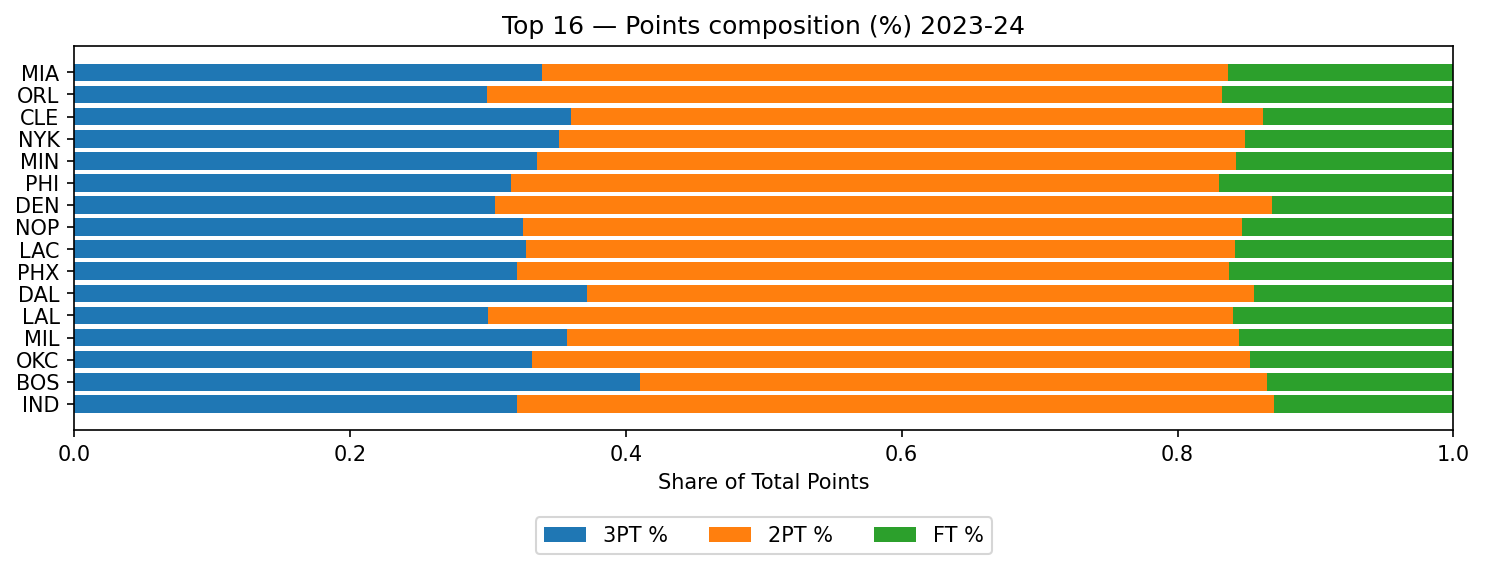

In [153]:
import matplotlib.pyplot as plt, numpy as np

comp = top16.copy()
comp["PTS_3"]  = comp["FG3M"]*3
comp["PTS_2"]  = (comp["FGM"] - comp["FG3M"])*2
comp["PTS_FT"] = comp["FTM"]*1
total = comp["PTS_3"] + comp["PTS_2"] + comp["PTS_FT"]
comp["S_3"] = comp["PTS_3"]/total
comp["S_2"] = comp["PTS_2"]/total
comp["S_FT"]= comp["PTS_FT"]/total
comp = comp.sort_values("PTS", ascending=False).reset_index(drop=True)

y = np.arange(len(comp)); left = np.zeros(len(comp))
plt.figure(figsize=(10,4))
for label, col in [("3PT %","S_3"),("2PT %","S_2"),("FT %","S_FT")]:
    plt.barh(y, comp[col].values, left=left, label=label)
    left += comp[col].values
plt.yticks(y, comp["TEAM_ABBREVIATION"])
plt.xlabel("Share of Total Points"); plt.title(f"Top 16 — Points composition (%) {season}")
plt.xlim(0,1)
plt.legend(ncol=3, bbox_to_anchor=(0.5,-0.2), loc="upper center")
plt.tight_layout(); plt.show()


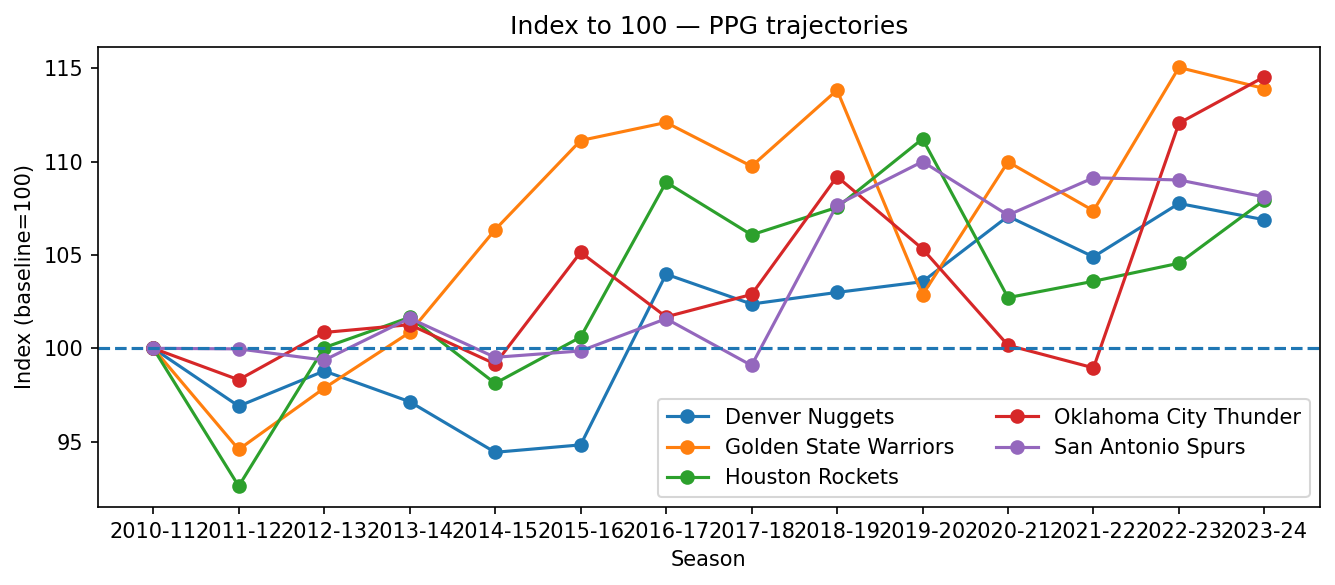

In [159]:
import matplotlib.pyplot as plt

watch = (team_season.groupby("TEAM_NAME")["PTS"].sum()
         .sort_values(ascending=False).head(5).index.tolist())
pivot = team_season[team_season["TEAM_NAME"].isin(watch)] \
    .pivot(index="SEASON_YEAR", columns="TEAM_NAME", values="PPG")

# Index each series to its first observed season
indexed = pivot.apply(lambda s: (s / s.iloc[0]) * 100)

plt.figure(figsize=(9,4))
for t in indexed.columns:
    s = indexed[t].dropna()
    plt.plot(s.index, s.values, marker='o', label=t)

plt.axhline(100, linestyle='--')

plt.xlabel("Season")
plt.ylabel("Index (baseline=100)")
plt.title("Index to 100 — PPG trajectories")

plt.legend(ncol=2)
plt.tight_layout()
plt.show()


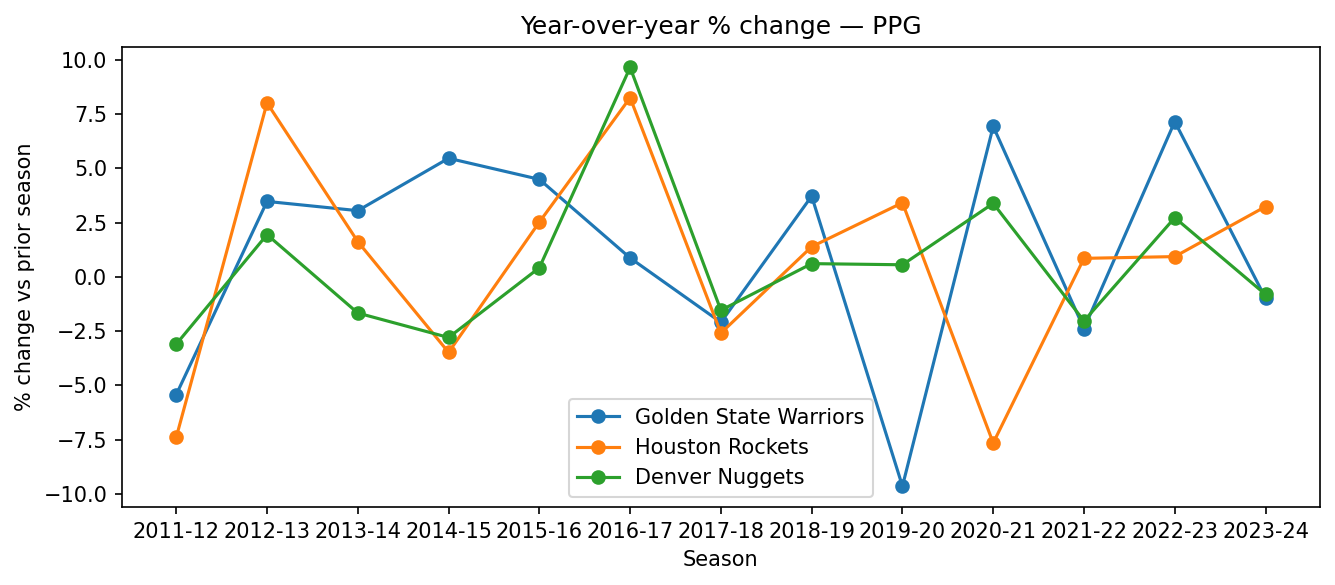

In [ ]:
import matplotlib.pyplot as plt

watch2 = watch[:3]  # pick a few to keep the plot clean
pct = pivot[watch2].pct_change()*100  # % change YoY

plt.figure(figsize=(9,4))
for t in pct.columns:
    s = pct[t].dropna()
    plt.plot(s.index, s.values, marker='o', label=t)
plt.xlabel("Season"); plt.ylabel("% change vs prior season")
plt.title("Year-over-year % change — PPG")
plt.legend()
plt.tight_layout()
plt.show()



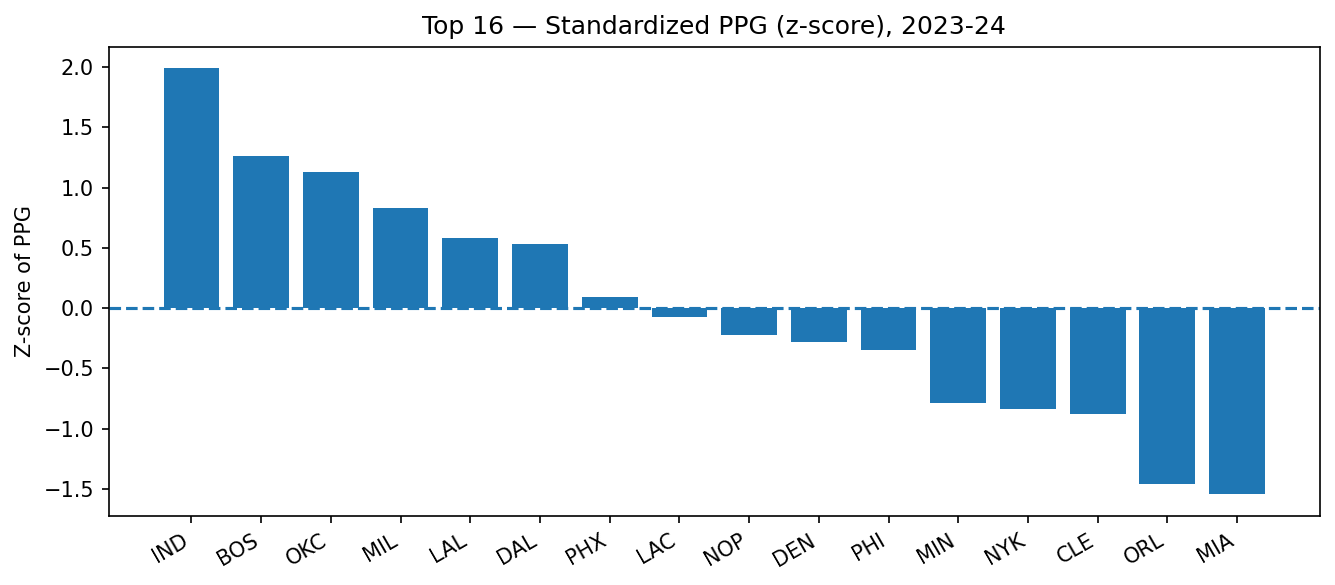

In [157]:
import matplotlib.pyplot as plt, numpy as np

df = top16.copy()
mu, sd = df["PPG"].mean(), df["PPG"].std(ddof=1)
df["PPG_Z"] = (df["PPG"] - mu) / sd
df = df.sort_values("PPG_Z", ascending=False)

plt.figure(figsize=(9,4))
x = np.arange(len(df))
plt.bar(x, df["PPG_Z"].values)
plt.xticks(x, df["TEAM_ABBREVIATION"].values, rotation=30, ha="right")
plt.ylabel("Z-score of PPG"); plt.title(f"Top 16 — Standardized PPG (z-score), {season}")
plt.axhline(0, linestyle='--')
plt.tight_layout(); plt.show()


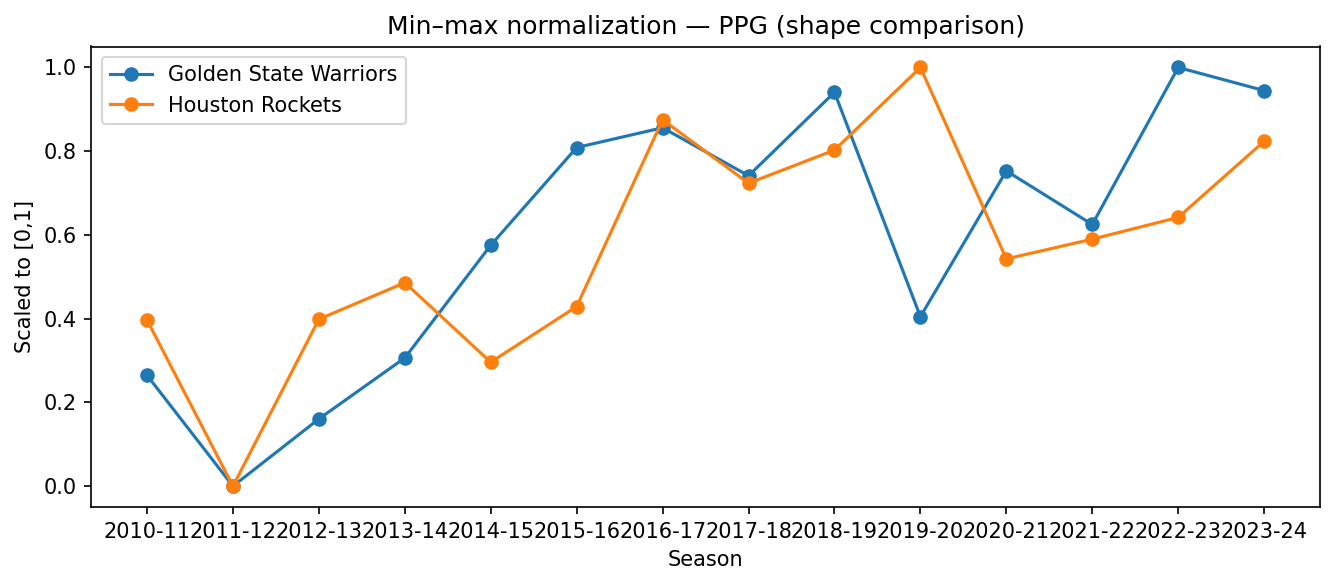

In [158]:
import matplotlib.pyplot as plt

watch3 = watch[:2]  # two teams to compare shapes
ppg_sel = team_season[team_season["TEAM_NAME"].isin(watch3)] \
    .pivot(index="SEASON_YEAR", columns="TEAM_NAME", values="PPG")

def minmax(s):
    lo, hi = s.min(), s.max()
    return (s - lo) / (hi - lo) if hi > lo else s*0

mm = ppg_sel.apply(minmax)

plt.figure(figsize=(9,4))
for t in mm.columns:
    s = mm[t].dropna()
    plt.plot(s.index, s.values, marker='o', label=t)
plt.xlabel("Season"); plt.ylabel("Scaled to [0,1]")
plt.title("Min–max normalization — PPG (shape comparison)")
plt.legend(); plt.tight_layout(); plt.show()
